In [2]:
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning Algorithm
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# ########
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Data Load
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dataset = [train, test]

In [3]:
# Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
# Continous: Age, Fare. Discrete: SibSp, Parch.
print("Train Dataset info:")
train.info()
print("\n")
print("Test Dataset info:")
test.info()

Train Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Test Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Artagaveytia, Mr. Ramon",male,347082,G6,S
freq,1,577,7,4,644


In [5]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


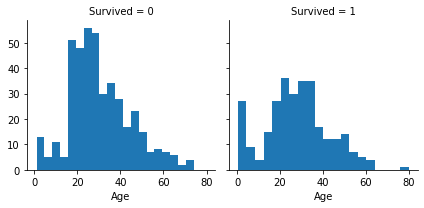

In [9]:
gr = sns.FacetGrid(train, col='Survived')
gr.map(plt.hist, 'Age', bins=20)

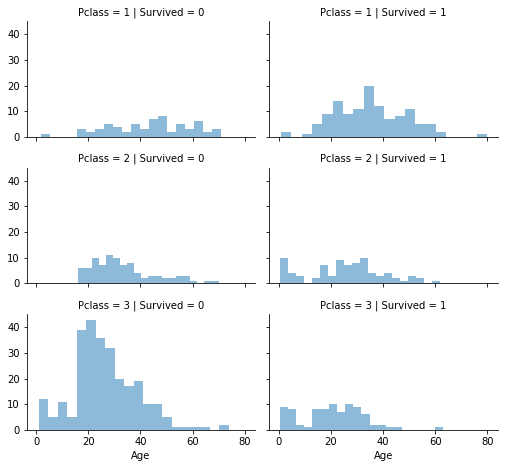

In [10]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

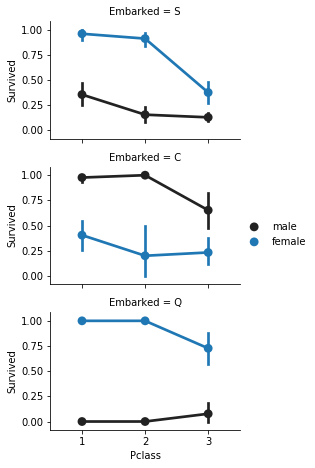

In [11]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', pallete='deep')
grid.add_legend()

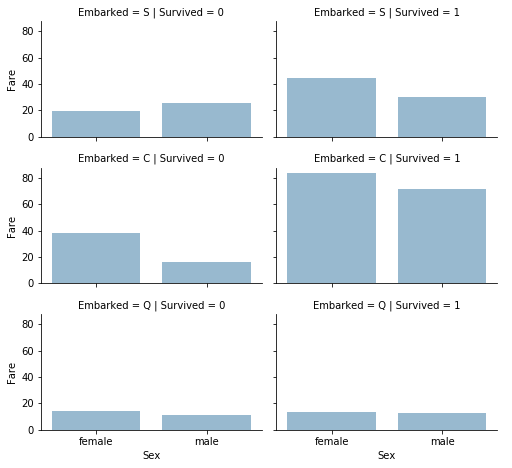

In [12]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [13]:
print("Before:", train.shape, test.shape, dataset[0].shape, dataset[1].shape)

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
dataset = [train, test]

print("After:", train.shape, test.shape, dataset[0].shape, dataset[1].shape)

Before: (891, 12) (418, 11) (891, 12) (418, 11)
After: (891, 10) (418, 9) (891, 10) (418, 9)


In [14]:
for data in dataset:
    data['Title'] = data['Name'].str.split(",", expand=True)[1].str.split(".", expand=True)[0]
    start_min = 10
    title_names = (data["Title"].value_counts() < start_min)
    data["Title"] = data["Title"].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    
print(pd.crosstab(train['Title'], train['Sex']))
train.head(5)

Sex      female  male
Title                
 Master       0    40
 Miss       182     0
 Mr           0   517
 Mrs        125     0
Misc          7    20


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [15]:
# Clean Data

for data in dataset:
    data["Age"].fillna(data["Age"].median(), inplace=True)
    data["Fare"].fillna(data["Fare"].median(), inplace=True)
    data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
    
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [16]:
# Feature Engineering..

for data in dataset:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 1
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0
    
    data['FareBand'] = pd.qcut(data['Fare'], 4)
    data['AgeBand'] = pd.cut(data['Age'].astype(int), 5)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBand,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,1,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,1,"(7.91, 14.454]","(32.0, 48.0]"


In [17]:
label = LabelEncoder()
for data in dataset:
    data['Title'] = label.fit_transform(data["Title"])
    data["Fare"] = label.fit_transform(data["FareBand"])
    data["Age"] = label.fit_transform(data["AgeBand"])
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBand,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,0,S,2,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,3,C,3,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,1,S,1,1,1,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,3,S,3,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,1,S,2,1,1,"(7.91, 14.454]","(32.0, 48.0]"


In [18]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [19]:
for data in dataset:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    data['Embarked'] = data['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBand,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,2,2,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,0,3,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,2,1,1,1,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3,2,3,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,1,2,2,1,1,"(7.91, 14.454]","(32.0, 48.0]"


In [20]:
for data in dataset:
    data['Age*Class'] = data.Age * data.Pclass
    
train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(5)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [21]:
train = train.drop(['PassengerId','Name','SibSp','Parch','FamilySize','AgeBand','FareBand'], axis=1)
test = test.drop(['Name','SibSp','Parch','FamilySize','AgeBand','FareBand'], axis=1)
dataset = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,2,2,0,3
1,1,1,1,2,3,0,3,0,2
2,1,3,1,1,1,2,1,1,3
3,1,1,1,2,3,2,3,0,2
4,0,3,0,2,1,2,2,1,6


In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,1,2,1,6
1,893,3,1,3,0,2,3,0,9
2,894,2,0,4,1,1,2,1,8
3,895,3,0,1,1,2,2,1,3
4,896,3,1,1,1,2,3,0,3


In [23]:
# Model, Predict and Solve.
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [24]:
# Logistic Regression..

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_prediction = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)* 100, 2)
acc_log

79.12

In [25]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.522092
6,IsAlone,0.086267
3,Fare,0.049268
2,Age,-0.066775
5,Title,-0.127378
7,Age*Class,-0.170812
4,Embarked,-0.224424
0,Pclass,-0.811622


In [26]:
# Support Vector Machine

svc = SVC()
svc.fit(X_train, Y_train)
Y_prediction = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.05

In [27]:
# KNN 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_prediction = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [29]:
# GaussianNB Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_prediction = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.09

In [30]:
# Perceptron.

per = Perceptron()
per.fit(X_train, Y_train)
Y_prediction = per.predict(X_test)
acc_per = round(per.score(X_train, Y_train) * 100, 2)
acc_per

78.79

In [31]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_prediction = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.9

In [32]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_prediction = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.89

In [33]:
# Decision Tree

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_prediction = tree.predict(X_test)
acc_tree = round(tree.score(X_train, Y_train) * 100, 2)
acc_tree

86.98

In [34]:
# Random Forest.

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
acc_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_forest

86.98

In [35]:
#  Model Evaluation.

models = pd.DataFrame({
    'Model' : ['Support Vector Machine', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Percepton',
              'Stochastic Gradient Decent', 'Linear SVC', 'Decison Tree'],
    'Score' : [acc_svc, acc_knn, acc_log, acc_forest, acc_gaussian, acc_per, acc_sgd, acc_linear_svc, acc_tree]
})


In [36]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_prediction})
submission.to_csv("my_predictions.csv", index=False)
print("Your submission saved!")

Your submission saved!
